# Explore Metrics

In this notebook, we'll use the MNIST dataset to explore different metrics available in scikit-learn and keras

In [17]:
from keras.datasets import mnist, imdb
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## mnist.load_data() will automatically download the dataset if you don't have it
(MNIST_train_X, MNIST_train_y), (MNIST_test_X, MNIST_test_y) = mnist.load_data()


MNIST_train_X = MNIST_train_X.reshape((60000, 28 * 28))
MNIST_train_X = MNIST_train_X.astype('float32') / 255

MNIST_test_X = MNIST_test_X.reshape((10000, 28 * 28))
MNIST_test_X = MNIST_test_X.astype('float32') / 255

from keras.utils import to_categorical

MNIST_train_y = to_categorical(MNIST_train_y)
MNIST_test_y = to_categorical(MNIST_test_y)

# Build the architecture of the network

In [3]:
from keras import models
from keras import layers

In [4]:
network = models.Sequential() #we'll stick to sequential for this course

network.add(layers.Dense(512, activation='relu', input_shape=(784,)))  # Dense is the same as fully connected.
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(MNIST_train_X, MNIST_train_y, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2559 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1032 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9888


In [5]:
test_loss, test_acc = network.evaluate(MNIST_test_X, MNIST_test_y)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 787us/step - loss: 0.0836 - accuracy: 0.9742
test_acc: 0.9742000102996826


## Same accuracy as we are used to seeing.  But what about those other metrics?


## Let's generate predictions, so we can evaluate our network



We are going to generate our predictions from the _test_ data.
Then we'll evaluate these predictions with the F1-score. 
I'm going to import the f1_score from scikit-learn.

In [6]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
# get predictions, need to round them because keras returns floats. Sklearn will want 1's and 0's.
y_preds_test = network.predict(MNIST_test_X).round()

In [7]:
# use predictions to get more statistics than simple accuracy
fscores_test = f1_score(MNIST_test_y, y_preds_test, average=None)
print(fscores_test)

[0.98871795 0.99073666 0.9736211  0.97018696 0.97907095 0.97136312
 0.97775424 0.97534517 0.94197952 0.97219464]


## The F1-score outputs an F1-score for _each class_ within the task

This is because the F1-score is relative to the "positive" class. So we get an F1 score for every single label.

That means we have an array of 10 scores, each one score corresponds to a digit label.  So we see that our model does the best on "1".

Let's plot it for a more intuitive look

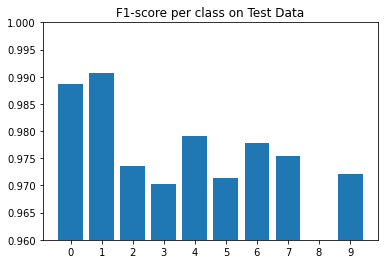

In [8]:
plt.bar(range(10),fscores_test)
plt.ylim(0.96,1.0)
plt.xticks(range(10))
plt.title("F1-score per class on Test Data");

In [9]:
print (classification_report(MNIST_test_y, y_preds_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.95      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.96      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.90      0.99      0.94       974
           9       0.97      0.97      0.97      1009

   micro avg       0.98      0.97      0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ok, now you run the same metrics on the IMDB dataset.

Try to recreate the work from memory as much as possible. It will help you if you don't copy paste.

In [12]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [14]:
def convert_to_binary(X):
    result = np.zeros((len(X), 10_000))
    for i, seq in enumerate(X):
        result[i, seq] = 1
    return result

In [16]:
def convert_to_count(X):
    result = np.zeros((len(X), 10_000))
    for i, seq in enumerate(X):
        for j in seq:
            result[i, j] += 1
    return result

In [19]:
# Get both binary bag and count bag from the training data
X_train_bin = convert_to_binary(train_data)
X_test_bin = convert_to_binary(test_data)

X_train_count = convert_to_count(train_data)
X_test_count = convert_to_count(test_data)

In [20]:
# Use TFIDF to further process the count data 
tf = TfidfTransformer()

X_train_tf = tf.fit_transform(X_train_count)
X_test_tf = tf.transform(X_test_count)

X_train_tf = X_train_tf.toarray()
X_test_tf = X_test_tf.toarray()

In [21]:
X_train_count[0].shape

(10000,)

In [26]:
model = models.Sequential()

model.add(layers.Dense(128, activation = 'relu', input_shape = (10_000,)))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Get the accuracy metrics for the binary data

In [27]:
model.fit(X_train_bin, train_labels, epochs=5, batch_size=512)
loss, acc = model.evaluate(X_test_bin, test_labels)
y_pred = model.predict(X_test_bin).round()

Epoch 1/5
49/49 [==============================] - 1s 22ms/step - loss: 0.4247 - accuracy: 0.8134
Epoch 2/5
49/49 [==============================] - 1s 23ms/step - loss: 0.2317 - accuracy: 0.9086
Epoch 3/5
49/49 [==============================] - 1s 22ms/step - loss: 0.1707 - accuracy: 0.9360
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 0.1256 - accuracy: 0.9549
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.4644 - accuracy: 0.8551


In [33]:
test_labels[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [34]:
fscores_test = f1_score(test_labels, y_pred, average=None)
print(fscores_test)

[0.86629753 0.8419031 ]


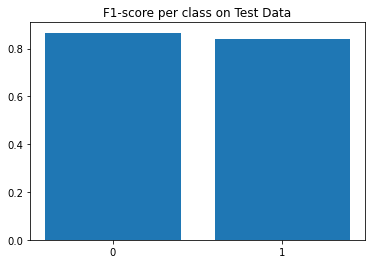

In [36]:
plt.bar(range(2),fscores_test)
plt.xticks(range(2))
plt.title("F1-score per class on Test Data");

In [37]:
print (classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     12500
           1       0.93      0.77      0.84     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.85     25000
weighted avg       0.87      0.86      0.85     25000



# Get the accuracy metrics for the count data

In [38]:
model.fit(X_train_count, train_labels, epochs=5, batch_size=512)
loss, acc = model.evaluate(X_test_count, test_labels)
y_pred = model.predict(X_test_count).round()

Epoch 1/5
49/49 [==============================] - 1s 20ms/step - loss: 0.2441 - accuracy: 0.9479
Epoch 2/5
49/49 [==============================] - 1s 21ms/step - loss: 0.1081 - accuracy: 0.9698
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0620 - accuracy: 0.9848
Epoch 4/5
49/49 [==============================] - 1s 18ms/step - loss: 0.0674 - accuracy: 0.9889
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.8730


In [39]:
fscores_test = f1_score(test_labels, y_pred, average=None)
print(fscores_test)

[0.87289765 0.87318204]


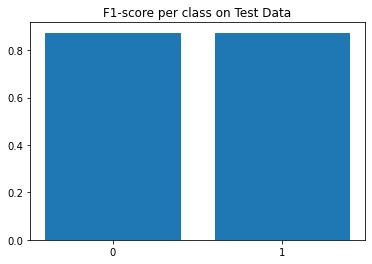

In [40]:
plt.bar(range(2),fscores_test)
plt.xticks(range(2))
plt.title("F1-score per class on Test Data");

In [41]:
print (classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



# Get the accuracy metrics for the TFIDF data

In [42]:
model.fit(X_train_tf, train_labels, epochs=5, batch_size=512)
loss, acc = model.evaluate(X_test_tf, test_labels)
y_pred = model.predict(X_test_tf).round()

Epoch 1/5
49/49 [==============================] - 1s 24ms/step - loss: 0.1408 - accuracy: 0.9632
Epoch 2/5
49/49 [==============================] - 1s 20ms/step - loss: 0.0654 - accuracy: 0.9831
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0300 - accuracy: 0.9938
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0110 - accuracy: 0.9985
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.7107 - accuracy: 0.8536


In [43]:
fscores_test = f1_score(test_labels, y_pred, average=None)
print(fscores_test)

[0.85666171 0.85040464]


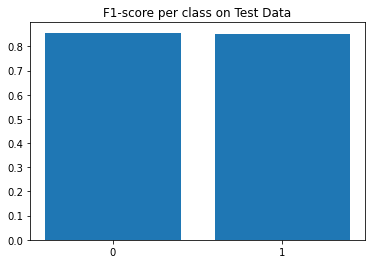

In [44]:
plt.bar(range(2),fscores_test)
plt.xticks(range(2))
plt.title("F1-score per class on Test Data");

In [45]:
print (classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     12500
           1       0.87      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



# Cancer Detector

Which metric would be most important for the task of detecting cancer?


Your answer here:

# Detecting credit card fraud

What would be a good metric to judge this?

Your answer here: